In [23]:
#import libs and tools
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
from pandas import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [31]:
df_arima = pd.read_csv('c:/Users/ThinkPad/Desktop/models/data_after_preprocessing.csv',float_precision='round_trip')
df_arima['timestamp'] = pd.to_datetime(df_arima['timestamp'])
df_arima = df_arima.set_index('timestamp') 
df_arima=df_arima['2020-05-07':'2020-06-06']
df_arima=df_arima[df_arima["pm10"]<=25]
print(df_arima)

mean_5min=df_arima.resample('5min').mean()
df_arima = mean_5min.dropna()
df_arima['datetime'] = df_arima.index
df_arima.info()

                     humidity_bme280  ir_brightness  brightness  \
timestamp                                                         
2020-05-07 00:03:17           65.277            253          21   
2020-05-07 00:04:47           65.652            254          21   
2020-05-07 00:05:17           65.470            254          20   
2020-05-07 00:06:48           67.112            253          21   
2020-05-07 00:07:18           67.492            253          20   
...                              ...            ...         ...   
2020-06-06 23:57:32          100.000            253          15   
2020-06-06 23:58:02          100.000            253          14   
2020-06-06 23:58:32          100.000            254          15   
2020-06-06 23:59:02          100.000            254          14   
2020-06-06 23:59:32          100.000            253          15   

                     preassure_bme280  temperature_bme280  rainticks  winddir  \
timestamp                                      

In [32]:
df_arima=df_arima[['pm10','datetime']]
#df_arima['pm10'] = df_arima['pm10'].map(lambda x: str(x))
#df_arima['pm10'] = pd.to_numeric(df_arima['pm10'],errors='coerce')
df_arima.set_index('datetime',inplace=True)

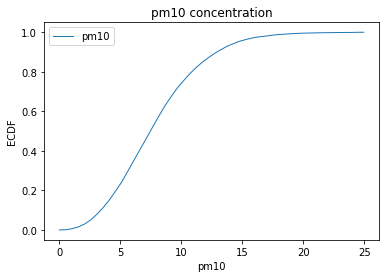

In [33]:

ecdf = sm.distributions.ECDF(df_arima.pm10)
x = np.linspace(0, max(df_arima.pm10))
y = ecdf(x)
plt.plot(x, y, linewidth = '1',label='pm10')
 
# x = np.linspace(min(sample), max(sample))
plt.xlabel('pm10')
plt.ylabel('ECDF')
plt.title('pm10 concentration')
plt.legend(loc='upper left')
plt.show()

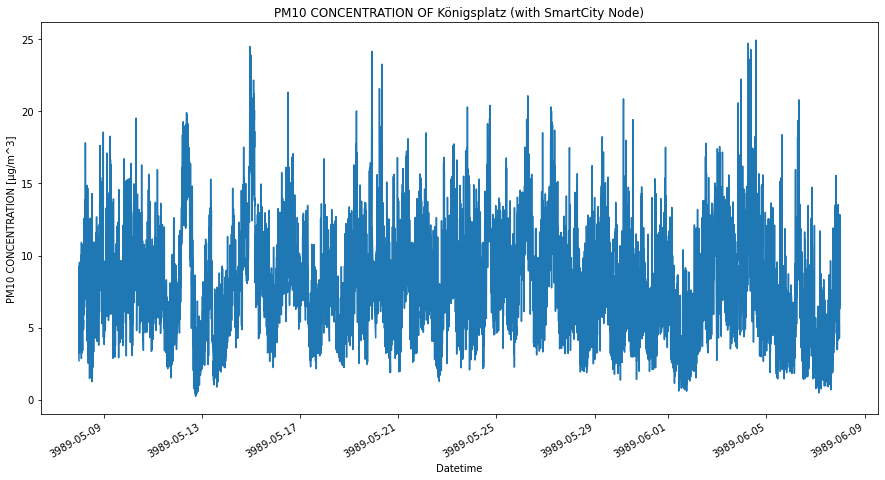

In [34]:

df_arima.pm10.plot(figsize=[15, 8])
plt.xlabel("Datetime")
plt.ylabel("PM10 CONCENTRATION [μg/m^3]")
plt.title("PM10 CONCENTRATION OF Königsplatz (with SmartCity Node)")
plt.show()


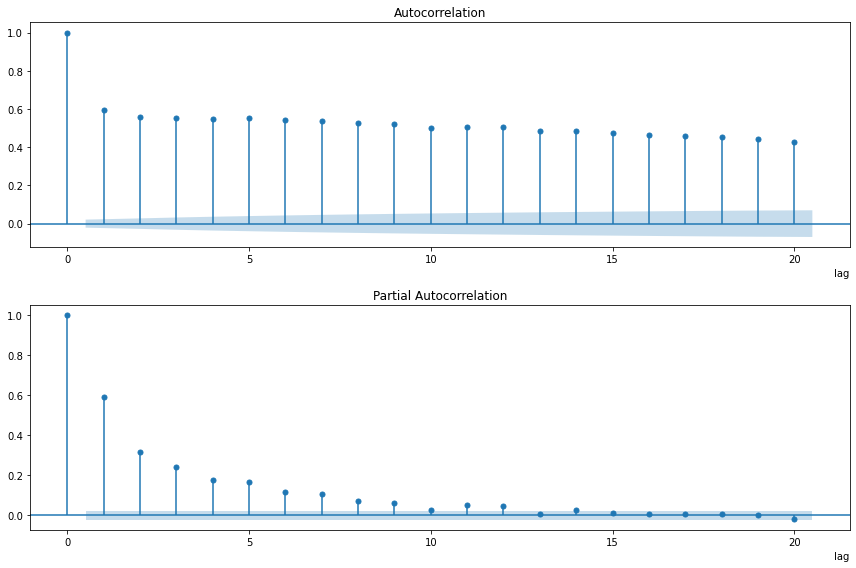

In [35]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima.pm10,lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
plt.xlabel("lag",loc="right")
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima.pm10,lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
plt.xlabel("lag",loc="right")
fig.tight_layout()


In [6]:
import itertools
d=range(0,1)
p=range(0,11)
q=range(0,6)
print("p=",p,"d=",d,"q=",q)
#产生不同的pdq元组,得到 p d q 全排列
pdq=list(itertools.product(p,d,q))
print("pdq:\n",pdq)


p= range(0, 11) d= range(0, 1) q= range(0, 6)
pdq:
 [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 0, 5), (5, 0, 0), (5, 0, 1), (5, 0, 2), (5, 0, 3), (5, 0, 4), (5, 0, 5), (6, 0, 0), (6, 0, 1), (6, 0, 2), (6, 0, 3), (6, 0, 4), (6, 0, 5), (7, 0, 0), (7, 0, 1), (7, 0, 2), (7, 0, 3), (7, 0, 4), (7, 0, 5), (8, 0, 0), (8, 0, 1), (8, 0, 2), (8, 0, 3), (8, 0, 4), (8, 0, 5), (9, 0, 0), (9, 0, 1), (9, 0, 2), (9, 0, 3), (9, 0, 4), (9, 0, 5), (10, 0, 0), (10, 0, 1), (10, 0, 2), (10, 0, 3), (10, 0, 4), (10, 0, 5)]


In [55]:
df_arima.index = pd.DatetimeIndex(df_arima.index).to_period('5min')
for param in pdq:
    try:
        mod = sm.tsa.ARIMA(df_arima,
                            order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

ARIMA(0, 0, 0) - AIC:52770.19723521104
ARIMA(0, 0, 1) - AIC:50836.832021545495
ARIMA(0, 0, 2) - AIC:50049.62910502298
ARIMA(0, 0, 3) - AIC:49634.309665478024
ARIMA(0, 0, 4) - AIC:49218.60436933348
ARIMA(0, 0, 5) - AIC:48993.54471430296
ARIMA(1, 0, 0) - AIC:49524.92060324809
ARIMA(1, 0, 1) - AIC:47519.252244885065
ARIMA(1, 0, 2) - AIC:47496.08837149779
ARIMA(1, 0, 3) - AIC:47497.26829903097
ARIMA(1, 0, 4) - AIC:47496.50263167166
ARIMA(1, 0, 5) - AIC:47493.86495992202
ARIMA(2, 0, 0) - AIC:48729.00708737796
ARIMA(2, 0, 1) - AIC:47496.88806783252
ARIMA(2, 0, 2) - AIC:47497.613259217695
ARIMA(2, 0, 3) - AIC:47498.727254394296
ARIMA(2, 0, 4) - AIC:47495.05315320694
ARIMA(2, 0, 5) - AIC:47495.5574036882
ARIMA(3, 0, 0) - AIC:48285.7564064791
ARIMA(3, 0, 1) - AIC:47496.76618446788
ARIMA(3, 0, 2) - AIC:47498.35695560422
ARIMA(3, 0, 3) - AIC:47493.562458017615
ARIMA(3, 0, 4) - AIC:47495.45073949052
ARIMA(3, 0, 5) - AIC:47488.600323330145
ARIMA(4, 0, 0) - AIC:47939.979079864104
ARIMA(4, 0, 1) - AI

C:\Users\ThinkPad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
                              ARMA Model Results                              
Dep. Variable:                   pm10   No. Observations:                 8632
Model:                     ARMA(7, 5)   Log Likelihood              -20575.315
Method:                       css-mle   S.D. of innovations              2.624
Date:                Mon, 30 Nov 2020   AIC                          41178.631
Time:                        12:35:15   BIC                          41277.516
Sample:                             0   HQIC                         41212.349
                                                                              
                 coef    std err          z      P>|z|      [0.0

<Figure size 864x576 with 0 Axes>

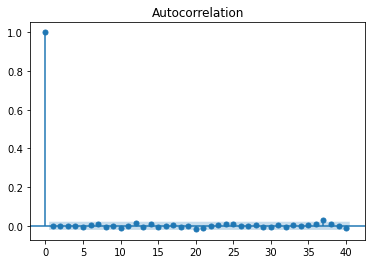

In [36]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(df_arima.pm10, order=(7, 0, 5))
results = model.fit()
resid = results.resid 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
print(results.summary())

<AxesSubplot:xlabel='timestamp'>

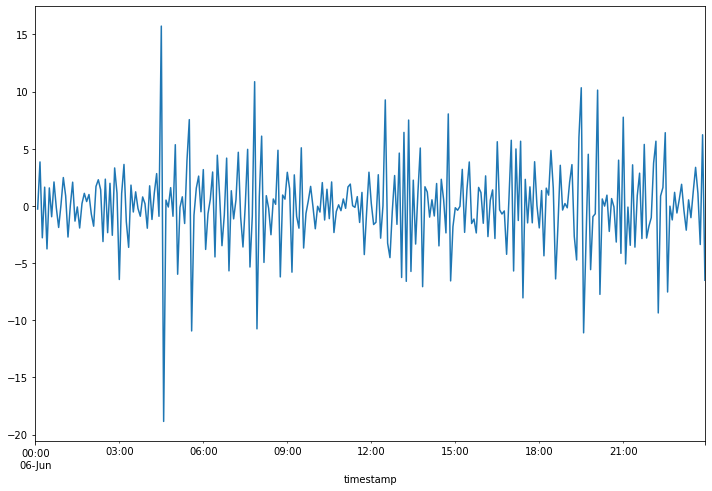

In [28]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = df.pm10.diff(1)
diff1.plot(ax=ax1)

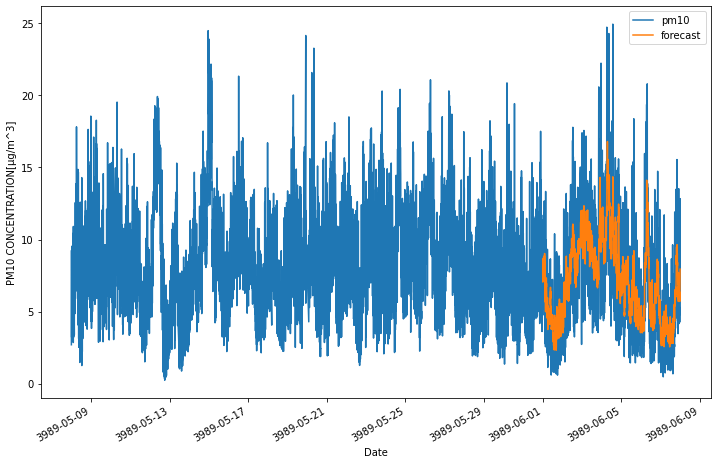

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = df_arima.plot(ax=ax,label='observed')
fig = results.plot_predict(start=pd.to_datetime('2020-05-31 00:00:00'),dynamic=False, ax=ax, plot_insample=False)
#predict_sunspots.plot(ax=ax,label='One-step ahead Forecast', alpha=.7)
ax.set_xlabel('Date')
ax.set_ylabel('PM10 CONCENTRATION[μg/m^3]')
plt.legend()
plt.show()

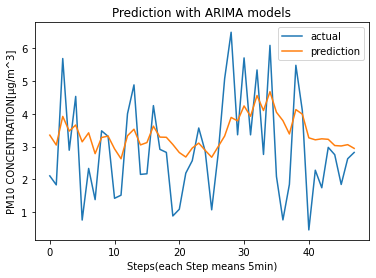

In [40]:
pm10 = df_arima["2020-06-06 00:00:00":"2020-06-06 03:55:00"].values
predict=results.predict(start=pd.to_datetime('2020-06-06 00:05:00'),end=pd.to_datetime('2020-06-06 04:00:00')).values
plt.plot(pm10,label="actual")
plt.plot(predict,label="prediction")
plt.title("Prediction with ARIMA models")
plt.xlabel("Steps(each Step means 5min)")
plt.ylabel('PM10 CONCENTRATION[μg/m^3]')
plt.legend()
plt.show()

In [21]:
predict_sunspots = results.predict(start=pd.to_datetime('2020-05-31 00:00:00'),dynamic=False)
print(predict_sunspots)

pm10_forecasted=predict_sunspots
pm10_truth = df_arima.pm10['2020-05-31':]
rmse = (((pm10_forecasted - pm10_truth) ** 2).mean()) ** 0.5
mae =np.mean(abs(pm10_forecasted-pm10_truth))
mape=np.mean(abs((pm10_forecasted-pm10_truth)/pm10_truth))
smape=np.mean(abs(pm10_forecasted-pm10_truth)/(abs(pm10_forecasted)+abs(pm10_truth)))

print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 3)))
print('The Mean Absolute Error of our prediction is {}'.format(round(mae, 3)))
print('The Mean Average Percentage Error of our prediction is {}'.format(round(mape, 3)))
print(smape)

datetime
2020-05-31 00:00:00    8.090471
2020-05-31 00:05:00    7.040912
2020-05-31 00:10:00    7.727409
2020-05-31 00:15:00    7.887121
2020-05-31 00:20:00    8.630456
                         ...   
2020-06-05 23:35:00    4.383440
2020-06-05 23:40:00    4.379310
2020-06-05 23:45:00    4.719142
2020-06-05 23:50:00    3.945372
2020-06-05 23:55:00    3.771675
Length: 1682, dtype: float64
The Root Mean Squared Error of our prediction is 2.865
The Mean Absolute Error of our prediction is 2.241
The Mean Average Percentage Error of our prediction is 0.428
0.16728593072546866


In [11]:
forecast, stderr, conf = results.forecast()
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Forecast: 3.659
Standard Error: 2.636
95% Confidence Interval: -1.508 to 8.825


In [12]:
print(results.forecast(36)[0])

[3.65853995 3.67202796 3.59995014 3.85997311 3.7606896  3.71354823
 3.9150554  4.02940156 3.90050464 4.05461455 4.23394217 4.1528255
 4.1781864  4.40554184 4.39344008 4.33765519 4.5286479  4.61740402
 4.52260239 4.63740538 4.79863853 4.72974796 4.75016313 4.93788747
 4.9362342  4.8852956  5.04380687 5.12270206 5.04504794 5.13615258
 5.27493131 5.22067972 5.23409271 5.3912571  5.39518509 5.35056915]


In [18]:
df = pd.read_csv('c:/Users/ThinkPad/Desktop/models/data_after_preprocessing.csv',float_precision='round_trip')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp') 
df=df['2020-06-06':'2020-06-06']

mean_5min=df.resample('5min').mean()
df = mean_5min.dropna()
print(df)

                     humidity_bme280  ir_brightness  brightness  \
timestamp                                                         
2020-06-06 00:00:00        79.054857     253.428571   15.428571   
2020-06-06 00:05:00        79.355500     253.500000   15.400000   
2020-06-06 00:10:00        79.291800     253.700000   15.400000   
2020-06-06 00:15:00        79.433900     253.600000   15.200000   
2020-06-06 00:20:00        79.279800     253.600000   15.300000   
...                              ...            ...         ...   
2020-06-06 23:35:00       100.000000     254.000000   14.300000   
2020-06-06 23:40:00       100.000000     253.400000   14.400000   
2020-06-06 23:45:00       100.000000     253.800000   14.400000   
2020-06-06 23:50:00       100.000000     253.200000   14.500000   
2020-06-06 23:55:00       100.000000     253.700000   14.400000   

                     preassure_bme280  temperature_bme280  rainticks  \
timestamp                                               

In [22]:
pm10=df["pm10"].values
pm10_truth=pm10[:6]

error =abs(results.forecast(6)[0] - pm10_truth)/pm10_truth
mape=np.mean(error)
rmse = (((results.forecast(6)[0] - pm10_truth) ** 2).mean()) ** 0.5
mae =np.mean(abs(results.forecast(24)[0]-pm10_truth))


print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 3)))
print('The Mean Absolute Error of our prediction is {}'.format(round(mae, 3)))
print('The Mean Average Percentage Error of our prediction is {}'.format(round(mape, 3)))
print(pm10_truth)



ValueError: operands could not be broadcast together with shapes (24,) (6,) 